In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
len(x_train)

60000

In [9]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train_reshaped=x_train.reshape(60000,784)
x_train_reshaped

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
model=Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(units=25,activation='relu',name='L1'),
    Dense(units=15,activation='relu',name='L2'),
    Dense(units=10,activation='linear',name='L3')
])

In [13]:
[layer1,layer2,layer3]=model.layers

In [14]:
w1,b1=layer1.get_weights()
w2,b2=layer2.get_weights()
w3,b3=layer3.get_weights()

In [22]:
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
model.compile(
loss=SparseCategoricalCrossentropy(from_logits=True),
optimizer=Adam(0.001))

In [23]:
model.fit(x_train_reshaped,y_train,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7730
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8957
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5360
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3899
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3192
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2362
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2257
Epoch 9/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2066
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1964
Epoch 11/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1915
Epoch 12/100
1875/1875 [==============================] - 2s 1ms/step - lo

In [48]:
X_test=x_train_reshaped[6].reshape(1,784)
prediction=model.predict(X_test)
f_x=tf.nn.softmax(prediction)
f_x

1/1 [==============================] - 0s 28ms/step


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.0000000e+00, 1.0000000e+00, 6.1262256e-10, 0.0000000e+00,
        1.6784471e-28, 1.4654412e-30, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)>

In [49]:
np.argmax(f_x)

1

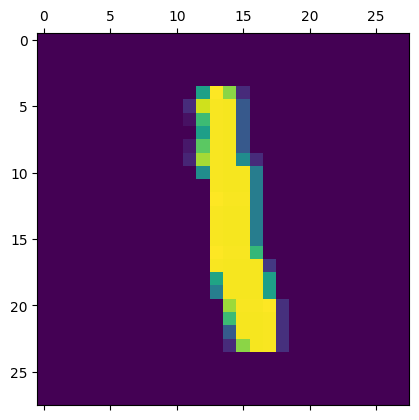

In [50]:
plt.matshow(x_train[6])